<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine-Learning-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
# Evaluation Metrics
import io, os, sys, setuptools
!pip install prophet
import prophet
from yellowbrick.classifier import ClassificationReport
#import fbprophet
#from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
df1 = pd.read_csv('/content/drive/MyDrive/content/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
df2 = pd.read_csv('/content/drive/MyDrive/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df3 = pd.read_csv('/content/drive/MyDrive/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
#df4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)
data = pd.concat([df1, df2, df3], ignore_index=False, axis=0)

Skipping line 1513591: expected 23 fields, saw 24

Skipping line 533719: expected 23 fields, saw 24

Skipping line 1149094: expected 23 fields, saw 41



In [125]:
data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,",ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location",Month,Day,Hour,Minute,Second
Date,,,,,,,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,0,0,0,0,False,False,NaN,1.000,1.000,0.000,1.000,0.000
2003-03-01 00:00:00,2003-03-01 00:00:00,1,1,1,0,False,True,NaN,3.000,1.000,0.000,0.000,0.000
2004-06-20 11:00:00,2004-06-20 11:00:00,2,2,2,0,False,False,NaN,6.000,20.000,11.000,0.000,0.000
2004-12-30 20:00:00,2004-12-30 20:00:00,3,0,0,1,False,False,NaN,12.000,30.000,20.000,0.000,0.000
2003-05-01 01:00:00,2003-05-01 01:00:00,4,0,3,0,False,False,NaN,5.000,1.000,1.000,0.000,0.000


In [ ]:
data.shape

(6484568, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484568 entries, 0 to 2688709
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [ ]:
#data = data.drop(columns=['Unnamed: 0','ID','Case Number'], axis=1)

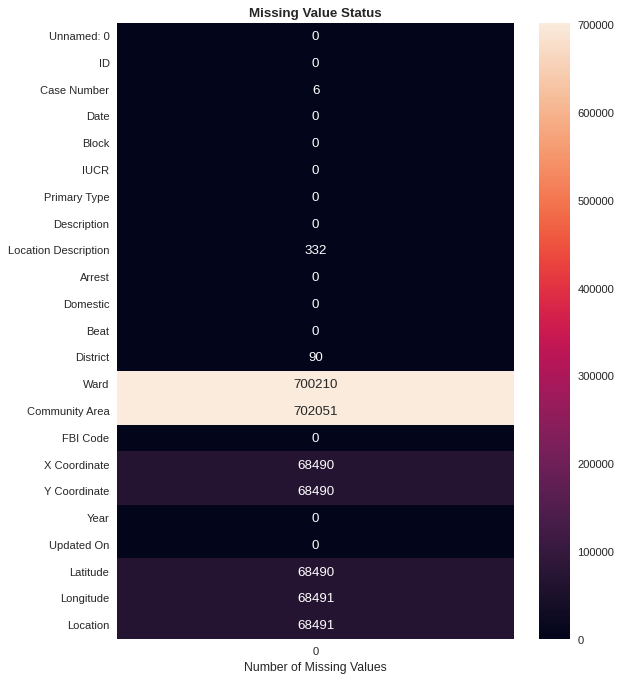

In [ ]:
#Plot missing values
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

In [ ]:
data = data.dropna()

NameError: ignored

In [ ]:
data = data.drop_duplicates()

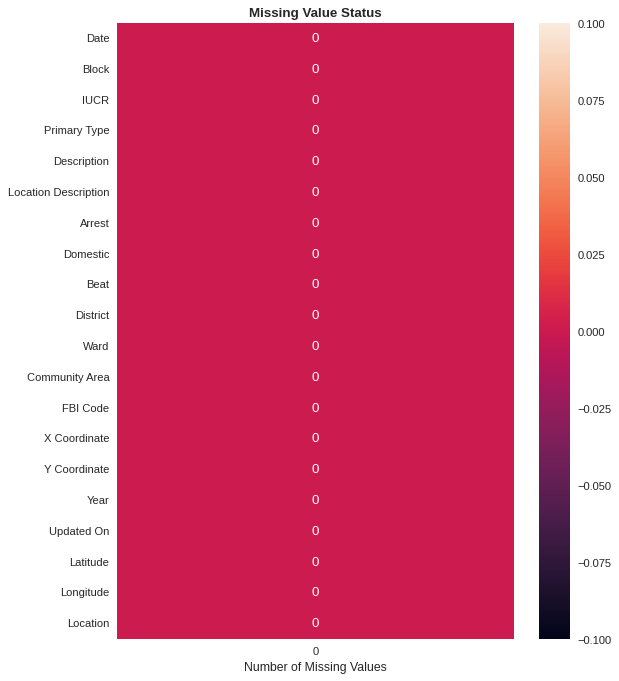

In [ ]:
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,4047598.000,4047598.000,4047598.000,4047598.000,4047598.000,4047598.000,4047598.000
mean,1206.933,11.324,22.536,37.769,1164488.912,2006.403,-87.672
std,706.297,6.950,13.805,21.589,17155.780,2.783,0.062
min,111.000,1.000,1.000,0.000,0.000,2001.000,-91.687
25%,624.000,6.000,10.000,23.000,1152955.000,2004.000,-87.714
50%,1111.000,10.000,22.000,32.000,1165901.000,2006.000,-87.667
75%,1733.000,17.000,34.000,58.000,1176327.000,2009.000,-87.629
max,2535.000,31.000,50.000,77.000,1205119.000,2011.000,-87.525


In [ ]:
data.describe(include='object')

,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Y Coordinate,Updated On,Latitude,Location
count,4047598,4047598,4047598,4047598,4047598,4047598,4047598,4047598.000,4047598,4047598.000,4047598
unique,1607220,33184,370,29,349,162,26,124533.000,444,561599.000,559529
top,01/01/2007 12:01:00 AM,100XX W OHARE ST,0486,THEFT,SIMPLE,STREET,06,1934241.000,04/15/2016 08:55:02 AM,41.976,"(41.976290414, -87.905227221)"
freq,172,10936,334051,820058,452336,1102196,820058,10930.000,2519023,10921.000,10924


In [ ]:
Classes = data['Primary Type'].unique()
Classes

array(['OTHER OFFENSE', 'THEFT', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'HOMICIDE', 'ROBBERY', 'BATTERY', 'ARSON', 'BURGLARY', 'ASSAULT',
       'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'KIDNAPPING',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'INTIMIDATION',
       'LIQUOR LAW VIOLATION', 'STALKING', 'OBSCENITY',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'RITUALISM'],
      dtype=object)

In [ ]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
data.index = pd.DatetimeIndex(data.Date)

In [ ]:
data['date2'] = pd.to_datetime(data['Date'])
data['Year'] = data['date2'].dt.year
data['Month'] = data['date2'].dt.month
data['Day'] = data['date2'].dt.day
data['Hour'] = data['date2'].dt.hour
data['Minute'] = data['date2'].dt.minute
data['Second'] = data['date2'].dt.second
data = data.drop(['date2'], axis=1)
data = data.drop(['Updated On'], axis=1)
data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
Date,,,,,,,,,,,,,,,,,,,,,
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.000,...,1876757.000,2003,41.817,-87.637,"(41.817229156, -87.637328162)",3,1,0,0,0
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.000,...,1831051.000,2003,41.692,-87.635,"(41.691784636, -87.635115968)",5,1,1,0,0
2001-01-01 11:00:00,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531,5.000,...,1829375.000,2001,41.687,-87.608,"(41.687020002, -87.60844523)",1,1,11,0,0
2003-03-15 00:00:00,2003-03-15 00:00:00,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222,22.000,...,1844832.000,2003,41.730,-87.653,"(41.729712374, -87.653158513)",3,15,0,0,0
2003-01-01 00:00:00,2003-01-01 00:00:00,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134,11.000,...,1895755.000,2003,41.870,-87.708,"(41.869772159, -87.708180162)",1,1,0,0,0


In [ ]:
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20, 35), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

KeyError: ignored

In [ ]:
#eliminate none criminal crimes
data.drop(data.index [data[ 'Primary Type' ] == 'PUBLIC INDECENCY' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON-CRIMINAL (SUBJECT SPECIFIED)' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON-CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON - CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'OBSCENITY' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'CONCEALED CARRY LICENSE VIOLATION' ] , inplace = True)

In [ ]:
pl.plot(temp)
pl.title('Crime Per year count')
pl.xlabel('Year')
pl.ylabel('Number of crims')
pl.show()

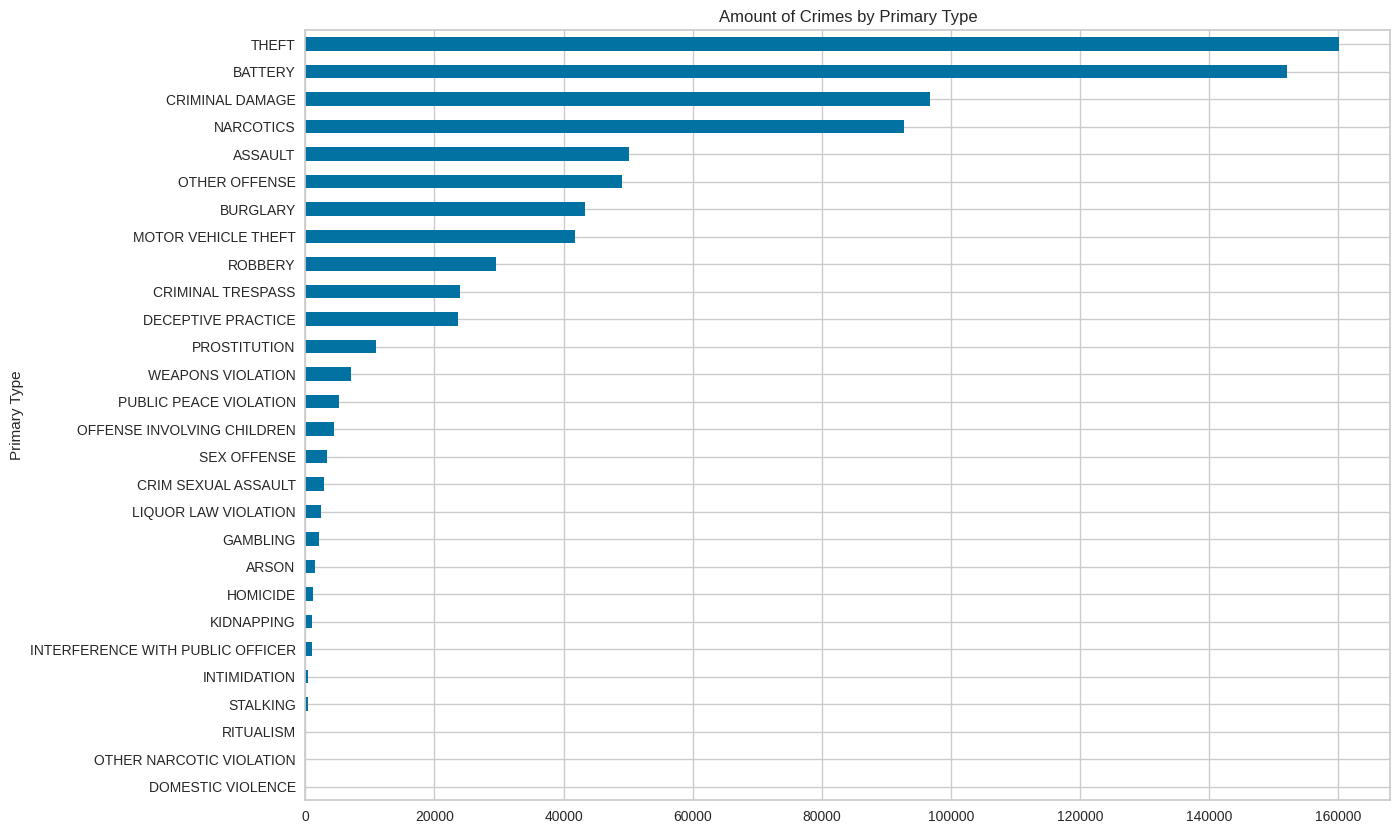

In [ ]:
pl.figure(figsize=(14,10))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Crime Type')
pl.xlabel('Amount of Crimes')
data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

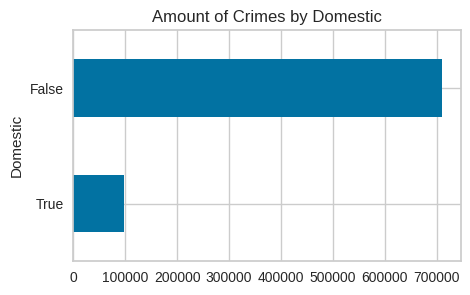

In [ ]:
pl.figure(figsize=(5,3))
pl.title('Amount of Crimes by Domestic')
pl.ylabel('Domestic')
pl.xlabel('Amount of Crimes')
data.groupby([data['Domestic']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

<Axes: xlabel='count', ylabel='Location Description'>

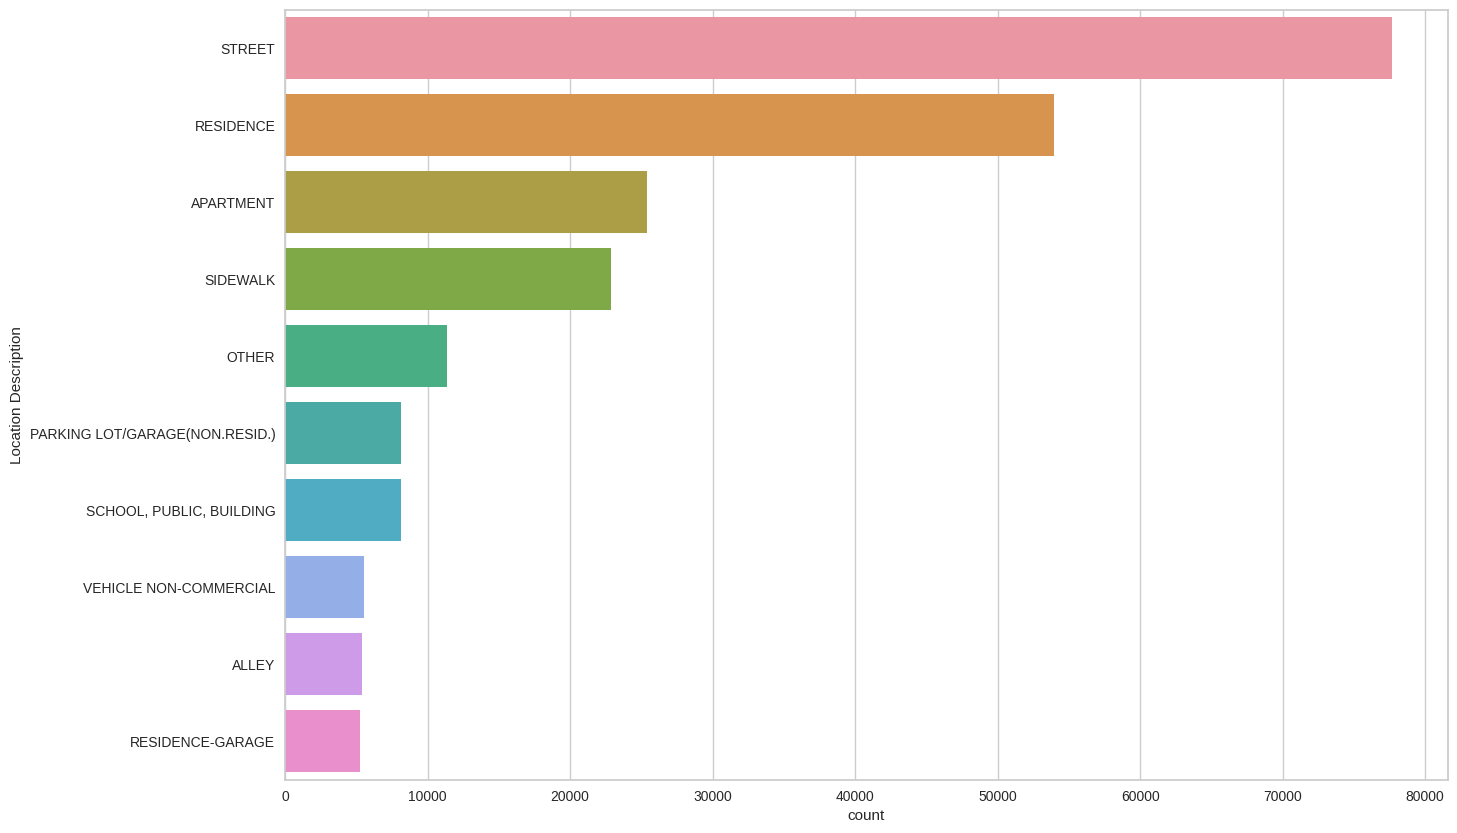

In [ ]:
pl.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:10].index)

In [ ]:
# Convert Categorical Attributes to Numerical
data['Block'] = pd.factorize(data["Block"])[0]
data['IUCR'] = pd.factorize(data["IUCR"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['Location Description'] = pd.factorize(data["Location Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]
data['Location'] = pd.factorize(data["Location"])[0]

<ipython-input-82-2f63600b84fe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


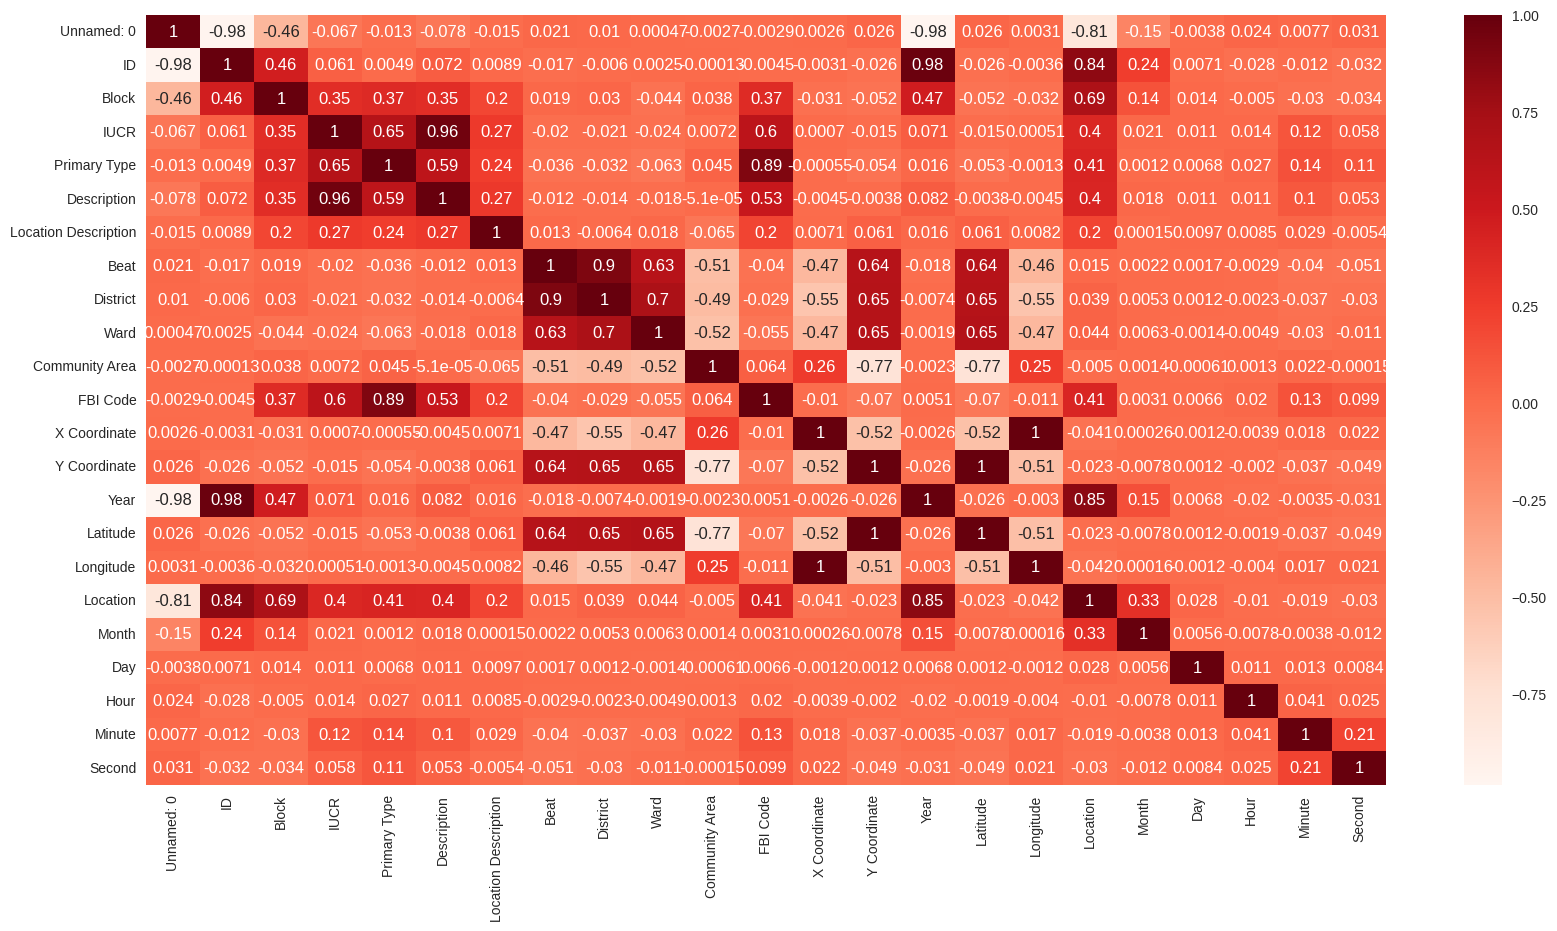

In [ ]:
#Using Pearson Correlation
pl.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=pl.cm.Reds)
pl.show()

In [ ]:
import folium

In [ ]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [ ]:
locations = data.groupby('Community Area').first()

In [ ]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [ ]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [ ]:
chicago_map

In [ ]:
# Feature Selection using Filter Method
# Split Dataframe to target class and features
X_fs = data.drop(columns= ['Primary Type','ID','Unnamed: 0','Case Number'], axis=1)
Y_fs = data['Primary Type']

In [ ]:
#Encode target labels into categorical variables:
data['Primary Type'] = pd.factorize(data["Primary Type"])[0]
data['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Block                  0.374
IUCR                   0.645
Primary Type           1.000
Description            0.591
Location Description   0.241
FBI Code               0.892
Location               0.415
Name: Primary Type, dtype: float64

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part.
Features = ["IUCR", "Description", "FBI Code","Location"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code', 'Location']


In [ ]:
Target = 'Primary Type'

In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(data,
                        test_size = 0.2,
                        train_size = 0.8,
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code', 'Location']
Target Class        :  Primary Type
Training Set Size   :  (955109, 28)
Test Set Size       :  (238778, 28)


In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955109 entries, NaT to 2001-02-27 07:55:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   IUCR         955109 non-null  int64
 1   Description  955109 non-null  int64
 2   FBI Code     955109 non-null  int64
 3   Location     955109 non-null  int64
dtypes: int64(4)
memory usage: 36.4 MB


In [ ]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,y=x2)

# Prediction
result = rf_model.predict(y[Features])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest Results ==========
Accuracy    :  0.9997110286542311
Recall      :  0.9997110286542311
Precision   :  0.9996822287598602
F1 Score    :  0.9997110286542311
Confusion Matrix: 


<Axes: >

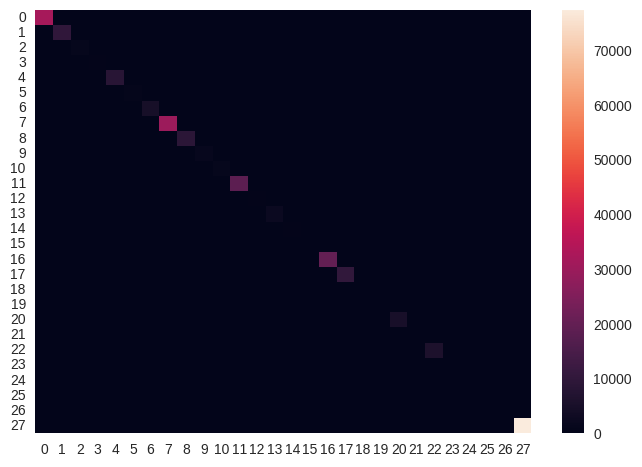

In [ ]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
sns.heatmap(confusion_m)

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ModelError: ignored

In [ ]:
# Neural Network
# Create Model with configuration
nn_model = MLPClassifier(solver='adam',
                         alpha=1e-5,
                         hidden_layer_sizes=(40,),
                         random_state=1,
                         max_iter=1000
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Neural Network Results ==========
Accuracy    :  0.6618155776495322
Recall      :  0.6618155776495322
Precision   :  0.699765749029856
F1 Score    :  0.6618155776495322
Confusion Matrix: 
[[31927     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 8113  1237     0     0    24     0    35    51     0     0     0     0
      0     0     0     0     0     0     0     0   417     0     0     5
      0     0     0     0]
 [  629    81    90     1    55     0     1     5     0     0     0     0
      0     0     0     0     0     0     0     0    55     0     0     1
      0     0     0     0]
 [  282    43     1    46   151     0     6    19     0     0     0     0
      0     0     0     0     0     0     0     0     7     0     0     0
      0     0     0     0]
 [ 3800   955     1     0  1742     2    39  1789     0     0     0     0
      0     0     0     0  

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ModelError: ignored

In [ ]:
# K-Nearest Neighbors
# Create Model with configuration
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== K-Nearest Neighbors Results ==========
Accuracy    :  0.798411076397323
Recall      :  0.798411076397323
Precision   :  0.7858310643536163
F1 Score    :  0.798411076397323
Confusion Matrix: 
[[27507   472    21     1  2088     5   107  1016    33     5    10   449
      0    13     1     2    58     0     0     0   139     0     0     0
      0     0     0     0]
 [ 1915  4559    83    53   529    33   194  1251   616    74    57    48
      0    17     1     4   100    14     0     3   212     0   113     5
      1     0     0     0]
 [  151   189   183    13    56     1    30    89    64    10    11    19
      0     4     2     0    53     0     0     2    32     0     9     0
      0     0     0     0]
 [   29   183     5    68    29     0     4   101    66     5     4    44
      0     4     1     0     0     0     0     0     7     0     4     0
      1     0     0     0]
 [ 3403   581    51    35  2787    16   136   403   344     6     5   183
      0     5     0     

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)],
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)

# Prediction
result = eclf1.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

NameError: ignored